# Introduction to Bayesian Statistics

---

## Return to Frequentist vs. Bayesian

As we jump into bayesian statistics, let's return to the difference between Frequentists and Bayesians.

Recall from the beginning of the course that:

**Frequentists** believe the "true" distribution is fixed (and not known). We can infer more more about this "true" distribution by engaging in sampling, testing for effects, and studying relevant parameters of the population.

**Bayesians** believe that data informs us about the distribution, and as we receive more data our view of the distribution can be updated, further confirming or denying our previous beliefs (but never in certainty).

---


## Interpretations of probability

**FREQUENTIST PROBABILITY** 

Probability is the true number of "successes" or "positive occurrances" measured across the hypothetical infinite number of samples/events/trials:

### $$p = \lim_{n \to +\infty} \frac{k}{n}$$

where:

$p$ is the probability of an occurance.

$k$ is the number of occurances.

$n$ is the number of events.

---

**BAYESIAN PROBABILITY**

Probability is a representation of our uncertainty given what we know and believe to be true. Given a number of observed positive occurances over a number of events *and our prior belief about the true probability of positive occurances,* what is the *distribution of the true probability*?

### $$P\left(\;true\;|\;observed\;\right) = \frac{P\left(\;observed\;|\;true\;\right)}{P(\;observed\;)} P\left(\;true\;\right)$$

where:

$P\left(\;true\;|\;observed\;\right)$ is the **posterior probability** or **conditional probability**. This is the probability of an occurance given what we observed.

$P\left(\;observed\;|\;true\;\right)$ is the **likelihood,** which is the probability of what we observed  given our prior belief about the probability of occurance. 

${P(\;observed\;)}$ is the **total probability** of the observed data. 

$P\left(\;true\;\right)$ is the **prior probability** belief. It is what you thought the probability was before observing the events.

---

## Bayes' theorem

Some of you might recognize the above formula as Bayes' theorem. Typically Bayes' theorem is written:

### $$P\left(A\;|\;B\right) = \frac{P\left(B\;|\;A\right)\;P\left(A\right)}{P(B)}$$

Where:

$A$ and $B$ are anything that take probabilities (which is essentially everything).

$P(B|A)$ and $P(A|B)$ are the probabilities of $B$ conditional on $A$ and vice versa.

This is just another way of writing:

### $$P\left(A\right)\;P\left(B\;|\;A\right) = P\left(B\right)\;P\left(A\;|\;B\right)$$

Which is derived from the fact that:

### $$P\left(A\;\cap\;B\right) = P\left(A\right)\;P\left(B\;|\;A\right) = P\left(B\right)\;P\left(A\;|\;B\right)$$

Where $P\left(\;A\;\cap\;B\right)$ is the probability of $A$ *and* $B$.

---

### Denominator of Bayes' theorem: the "total probability"

![total probability](./assets/images/output_27_0.png)

In the above picture, we see that each $A_1,..., A_5$ includes a piece of the center oval. In this example the oval represents $B$.

Basic probability defines the following relation: $$P(A|B) = \frac{ A \cap B }{B}$$ 

Intuitively, the relation indicates is that $P(A|B)$ is a ratio of the part of A that is common with B, *over the entirety of $B$*. 

Therefore, **the total probability can be thought of as the exhaustive sum of all probabilities on sets that share elements with B**. This equals simply the probability of B in our set of events.

So what is the purpose of the total probability with respect to the rest of Bayes formula? **In essence, it "normalizes" the posterior distribution to integrate to 1** ensuring we can interpret this distribution as probabilities.

---

### Solving for probability using Bayes' theorem is easy when you know $P(B)$

Let's say we have two coins. Coin **FAIR** and coin **RIGGED**

    coin FAIR has a 50% chance of flipping heads.
    coin RIGGED has 99% chance of flipping heads.
    
Your friend chooses one of the two coins at random. He flips the coin and gets heads. 

What is the probability that the coin flipped was **FAIR**?

In [1]:
import numpy as np

# Our hypothesis is our belief that the coin flipped was fair before we saw the outcome. 
# 0.5 since he chose at random.
hypothesis_fair = 0.5

# probability that we would get heads given our hypothesis was true, that the coin is the fair one:
prob_flip_given_fair = 0.5

# total probability of getting heads:
prob_heads = (149./200.)

# solve for the probability our hypothesis is true given the flip:
hypothesis_true = (prob_flip_given_fair / prob_heads) * hypothesis_fair

print hypothesis_true

0.335570469799


---

## Bayes' theorem and modeling

We can also interpret Bayes formula in the context of statistical modeling:

### $$P\left(model\;|\;data\right) = \frac{P\left(data\;|\;model\right)}{P(data)}\; P\left(model\right)$$

What is the probability of our model being true, given the data we have? 

This depends on the likelihood of the observed data given our model, the probability of the data iself, and our prior belief about the model.


---

## Back to the coin

Say we flip a coin 100 times get heads 58 times. 

What's the probability that the coin is not fair?

We can solve the probability of getting at least this many heads given a probability of 0.5 using the **binomial probability formula:**

### $$P(\;\text{at least k heads in n flips}\;) = \sum_{k}^n\binom{n}{k}p^kq^{n-k}$$

Where:

$n$ is the number of flips.

$k$ is the number of heads.

$p$ is the probability of heads.

$q$ is the probability of tails.

$\binom{n}{k}$ describes "n choose k" or the possible **combinations of k instances in n events**:

### $$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

---

**Calculate the probability of at least 58 heads in 100 flips with a probability of heads = 0.5.**

NOTE: Factorials can be calculated with `np.math.factorial()`


In [2]:
# set up the info:
flips = 100
heads = 58
prob = 0.5

# write function to calculate probability at an exact number of heads:
def prob_k(k, n, p):
    # compute n choose k combinations:
    flips_choose_heads = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k))
    
    # compute probability:
    chance = flips_choose_heads * (p**k) * ((1-p)**(n-k))
    
    return chance


# sum the probabilities up to the heads:
probabilities = [prob_k(head, flips, prob) for head in range(1, heads+1)]
prob = 1 - np.sum(probabilities)
print prob


0.044313040057


---

## Frequentist hypothesis testing revisited

Again, say we flip a coin 100 times get heads 58 times. 

Say we want to model whether the 58 out of 100 coin is "rigged" – not in fact a 50/50 weighted coin – using Frequentist methods.

Recall that Frequentists construct a **null hypothesis** and an **alternative hypothesis**.

**NULL HYPOTHESIS H0:** The coin is fair. P(heads) = 0.5

**ALTERNATIVE HYPOTHESIS HA:** The coin is not fair. P(heads) != 0.5

---

**THE Z-SCORE:**

A **z-score** is a normalized difference between a measured quantity and the quantity's expected value. It is defined as:

### $$ z = \frac{\bar{x} - E[x]}{std(\bar{x})}$$

Where:

$\bar{x}$ is the empirical (observed) quantity/measurement.

$E[x]$ is the expected value of the quantity.

$std(\bar{x})$ is the empirical standard deviation of the quantity.

---

**THE Z-TEST**

The z-test is a standard Frequentist hypothesis test that gives us a p-value (significance) of our measurement. It's validity depends on the Central Limit Theorem.

A (two-tailed) p-value is calculated as:

### $$\text{p-value} = P(|z| > z_0) = 2P(z > z_0) = 2(1 - \Phi(z_0))$$

Where:

$z_0$ is our measured z-value.

$P[|z| > z_0]$ is the probability that the absolute value of z-value is larger than our measured z-value.

$2(1-\Phi(z_0))$ is 2 times 1 minus the cumulative distribution function (CDF) of the normal distribution at point $z_0$.

Because the CDF is valued between 0 and 1, essentially **the p-value is the proportion of z-values that are larger than the absolute value of our z-value.**

---

![](http://ipython-books.github.io/images/gaussian.png)

---

### Coding the z-test

We have:

    100 coin flips
    58 heads
    
Our hypotheses are:

    Null hypothesis H0: probability of heads is 0.5
    Alternative hypothesis HA: probability of heads is not 0.5
    
We want to find the probability that we got 71 heads given that our null hypothesis is true (the p-value).

Under the null hypothesis H0:

    E[x] = 0.5*flips
    Var(x) = (flips * P(heads) * (1 - P(heads))
    
NOTE: The variance is defined as such because coin flips are part of the [Bernoulli distribution](http://mathworld.wolfram.com/BernoulliDistribution.html).

**Calculate the p-value below:**

In [3]:
# Import the normal distribution.
# The function for the CDF is norm.cdf(z)
# This takes a z-value as an argument.
from scipy.stats import norm

# set up our observations
flips = 100
heads = 58

# the probability of heads under the null hypothesis:
H0_p_heads = 0.5

# observed probability of heads:
obs_p_heads = float(heads)/flips
print obs_p_heads

# null mean:
u = H0_p_heads*flips
print u

# std of binomial sampling distribution
s = np.sqrt(flips * H0_p_heads * (1.0 - H0_p_heads))
print s

# z-score of our observed probability against our null hypothesis of 0.5:
z = (heads - u -0.5) / s
print z

# and use the norm.cdf() function to calculate the two-tailed p-value.
# use a 1-tailed test here (don't multiply by 2)
p_value = 1 * (1 - norm.cdf(np.abs(z)))
print p_value

0.58
50.0
5.0
1.5
0.0668072012689


---

## Bayesian model testing

Now let's look at the same scenario but from the Bayesian perspective. 

### $$P\left(weight\;|\;data\right) = \frac{P\left(data\;|\;weight\right)}{P(data)}\;P\left(weight\right)$$

Where $P\left(\;bias\;\right)$ is the **probability distribution** of getting heads when the coin is flipped.

---

**A UNIFORM PRIOR**

You may think we'd assign $P\left(weight\right) = 0.5$, but that's not actually correct. 

$P\left(weight\right)$ actually specifies a _distribution of possible biases for our coin_, with some biases potentially having a higher probability than others. 

When we were using Bayes formula before, we knew the true probability of heads, but now we just have a *distribution of beliefs* about what it might be.

If we have no idea, we can set our prior distribution $P\left(weight\right)$ to be a **uniform prior**. 

This indicates that we have no belief about the weighting of the coin whatsoever. We believe all potential weightings are equally likely.

With a uniform prior distribution, we set $P\left(weight\right) = 1$, which will give all possible biases exactly the same probability. (Imagine a "distribution" that is just a flat line.)



---

**THE LIKELIHOOD**

Luckily, we have already looked at the likelihood $P\left(observations\;|\;weight\right)$ earlier. It is the binomial probability function:

### $$P\left(data\;|\;weight\right) = \binom{flips}{heads}weight^{heads}(1-weight)^{flips-heads}$$

This is the probability distribution of the observations given a coin weight.

---

**THE TOTAL PROBABILITY OF THE DATA**

$P\left(data\right)$ is **the probability of our coin flips across all possible coin weights.** We calculate this by integrating over all possible weightings from 0 to 1:

### $$P\left(data\right) = \int_{i=0}^1P\left(data\;|\;weight\right)\;P\left(weight\right)\;\partial\;weight$$

The functional use of this is as a "normalizing factor" that guarantees the posterior distribution integrates to 1 and is therefore a probability distribution.


---

**THE POSTERIOR PROBABILITY DISTRIBUTION**

Due to nice properties of the binomial distribution and our uniform prior, the posterior distribution can be solved with a formula.

For the more detailed math/process behind this, [here is a good ipython notebook](http://ipython-books.github.io/featured-07/)). 

Keep in mind: tidy solutions like this to posterior distributions are pretty rare. This is an issue we will discuss later when we get to MCMC, which gets around the requirement for a "closed-form" solution to the posterior.

### $$P\left(weight\;|\;data\right) = \frac{\binom{flips}{heads}weight^{heads}(1-weight)^{flips-heads}}{\int_{i=0}^1P\left(data\;|\;weight\right)\;P\left(weight\right)\;\partial\;weight}$$

### $$P\left(weight\;|\;data\right) = (flips + 1)\binom{flips}{heads}weight^{heads}(1-weight)^{flips-heads}$$

**Remember: this is a probability distribution of our coin weighting given the data.**

---

**Code the posterior and plot it below**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# import scipy's combination function
from scipy.misc import comb

# our flips and heads:
flips = 100
heads = 58


# formula to calculate the posterior
def posterior(flips, heads):
    
    # biases across 0 to 1:
    biases = np.linspace(0,1,200)

    combs = comb(flips, heads)
    inv_bias = 1. - biases
    b_pr = biases**heads
    ib_pr = inv_bias**(flips-heads)
    return biases, (flips+1) * combs * b_pr * ib_pr


In [8]:
def posterior_plotter(flips, heads):
    
    biases, pr = posterior(flips, heads)

    plt.figure(figsize=(9,7))

    plt.plot(biases, pr, lw=2)
    plt.title('Coin weight probability distribution: '+str(flips)+' flips, '+str(heads)+' heads\n', fontsize=20)
    plt.xlabel('probability density', fontsize=16)
    plt.ylabel('P(bias|data)', fontsize=16)

    plt.show()

    print 'Area under probability curve:', np.trapz(pr, biases)

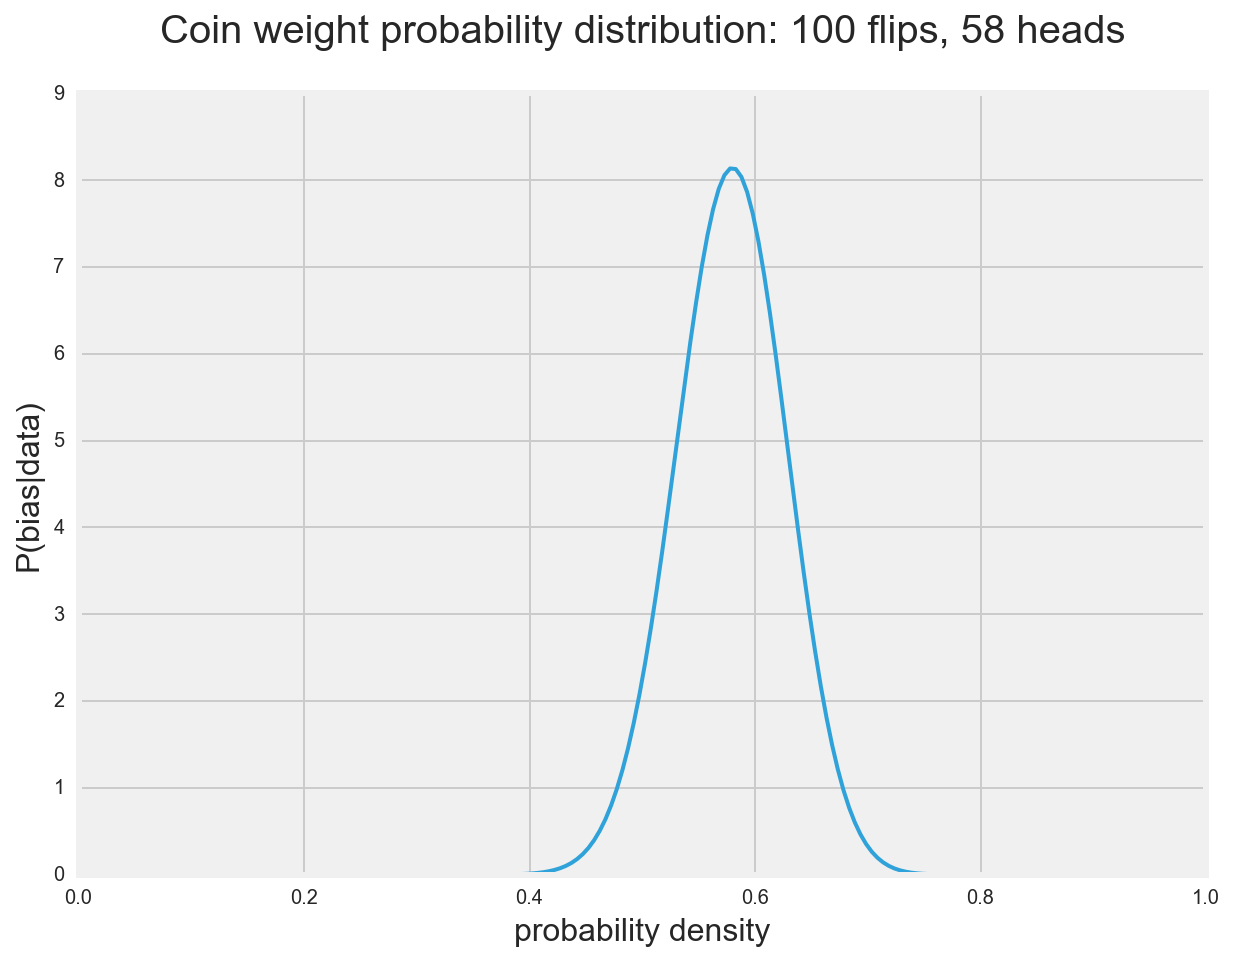

Area under probability curve: 1.0


In [9]:
posterior_plotter(100, 58)

---

### More references and sources for lecture:

http://ipython-books.github.io/featured-07/

http://stats.stackexchange.com/questions/31867/bayesian-vs-frequentist-interpretations-of-probability

http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/

https://simple.wikipedia.org/wiki/Bayes%27_theorem

https://en.wikipedia.org/wiki/Central_limit_theorem

http://www.cogsci.ucsd.edu/classes/SP07/COGS14/NOTES/binomial_ztest.pdf

https://en.wikipedia.org/wiki/Prior_probability#Uninformative_priors

https://arbital.com/p/bayes_rule/?l=1zq

https://betterexplained.com/articles/an-intuitive-and-short-explanation-of-bayes-theorem/

http://www.yudkowsky.net/rational/bayes/

http://people.stern.nyu.edu/wgreene/MathStat/Notes-2-BayesianStatistics.pdf

http://stats.stackexchange.com/questions/58564/help-me-understand-bayesian-prior-and-posterior-distributions

http://pages.uoregon.edu/cfulton/posts/bernoulli_trials_bayesian.html

http://chrisstrelioff.ws/sandbox/2014/12/11/inferring_probabilities_with_a_beta_prior_a_third_example_of_bayesian_calculations.html

https://www.chrisstucchio.com/blog/2013/magic_of_conjugate_priors.html

---